In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
csv_data = pd.read_csv('../baseball_data_crawling/Team_data_extraction_RunningBanana/training_data/training_data_all.csv')
csv_data.head(5)

,Unnamed: 0,Win_team,Team_1_pitcher_WHIP,Team_1_pitcher_piAn,Team_1_pitcher_piHom,Team_1_pitcher_sam,Team_1_pitcher_ball,Team_1_pitcher_ja,Team_1_pitcher_war,Team_2_pitcher_WHIP,...,Team_2_hitter_hit,Team_2_hitter_homrun,Team_2_hitter_sam,Team_2_hitter_ball,Team_2_hitter_deg,Team_2_hitter_ta,Team_2_hitter_chul,Team_2_hitter_do,Team_2_hitter_war,Team_2_hitter_ops
0,0,1,1.17,0.234273,0.026030,0.607143,0.205357,4.178571,2.41,1.40,...,0.297333,0.038541,0.184575,0.019147,0.153753,0.168974,0.308273,0.682200,3.445556,0.850556
1,1,0,1.23,0.245774,0.014304,0.826580,0.205294,3.889789,4.22,1.32,...,0.283333,0.028122,0.208332,0.009366,0.140507,0.148764,0.288695,0.316402,2.006667,0.779444
2,2,0,1.58,0.269179,0.024226,0.600000,0.363636,4.690909,2.28,1.31,...,0.253089,0.039986,0.222272,0.023351,0.139036,0.133181,0.267382,0.296098,1.167778,0.737193
3,3,0,1.32,0.258782,0.024590,0.740557,0.223658,3.489066,5.86,1.69,...,0.283111,0.028662,0.173910,0.014732,0.143559,0.140787,0.290519,0.725853,1.827778,0.778667
4,4,1,1.30,0.249373,0.023810,0.833779,0.235168,3.800107,5.07,1.29,...,0.287889,0.034753,0.208439,0.031419,0.147032,0.157054,0.305711,0.650661,2.257778,0.818000


In [4]:
drop_column = list(csv_data.columns)[0]
print(drop_column)

csv_data.drop(drop_column, axis=1, inplace=True)

Unnamed: 0


In [5]:
print(csv_data.dtypes)

Win_team                  int64
Team_1_pitcher_WHIP     float64
Team_1_pitcher_piAn     float64
Team_1_pitcher_piHom    float64
Team_1_pitcher_sam      float64
Team_1_pitcher_ball     float64
Team_1_pitcher_ja       float64
Team_1_pitcher_war      float64
Team_2_pitcher_WHIP     float64
Team_2_pitcher_piAn     float64
Team_2_pitcher_piHom    float64
Team_2_pitcher_sam      float64
Team_2_pitcher_ball     float64
Team_2_pitcher_ja       float64
Team_2_pitcher_war      float64
Team_1_hitter_hit       float64
Team_1_hitter_homrun    float64
Team_1_hitter_sam       float64
Team_1_hitter_ball      float64
Team_1_hitter_deg       float64
Team_1_hitter_ta        float64
Team_1_hitter_chul      float64
Team_1_hitter_do        float64
Team_1_hitter_war       float64
Team_1_hitter_ops       float64
Team_2_hitter_hit       float64
Team_2_hitter_homrun    float64
Team_2_hitter_sam       float64
Team_2_hitter_ball      float64
Team_2_hitter_deg       float64
Team_2_hitter_ta        float64
Team_2_h

In [6]:
print(csv_data.max())

Win_team                  1.000000
Team_1_pitcher_WHIP       5.000000
Team_1_pitcher_piAn       0.470588
Team_1_pitcher_piHom      0.153846
Team_1_pitcher_sam        1.363636
Team_1_pitcher_ball       2.619048
Team_1_pitcher_ja        31.500000
Team_1_pitcher_war        8.290000
Team_2_pitcher_WHIP      18.000000
Team_2_pitcher_piAn       0.571429
Team_2_pitcher_piHom      0.142857
Team_2_pitcher_sam       10.000000
Team_2_pitcher_ball      30.000000
Team_2_pitcher_ja       270.000000
Team_2_pitcher_war        8.290000
Team_1_hitter_hit         0.323556
Team_1_hitter_homrun      0.055550
Team_1_hitter_sam         0.299574
Team_1_hitter_ball        0.038710
Team_1_hitter_deg              inf
Team_1_hitter_ta          0.196406
Team_1_hitter_chul        0.334362
Team_1_hitter_do          0.883333
Team_1_hitter_war         0.883333
Team_1_hitter_ops         0.883333
Team_2_hitter_hit         0.327556
Team_2_hitter_homrun      0.060297
Team_2_hitter_sam         0.298864
Team_2_hitter_ball  

In [7]:
# inf 를 NaN 값으로 바꾼 후 NaN값을 평균값으로 치환하는 방식.
# 바로 평균값 mean을 사용하는 경우 inf를 포함하여 평균값을 계산하기 때문에
csv_data['Team_1_hitter_deg'].replace(np.inf, np.nan, inplace=True)
csv_data['Team_2_hitter_deg'].replace(np.inf, np.nan, inplace=True)

csv_data['Team_1_hitter_deg'].replace(np.nan, csv_data['Team_1_hitter_deg'].mean() * 0.7, inplace=True)
csv_data['Team_2_hitter_deg'].replace(np.nan, csv_data['Team_2_hitter_deg'].mean() * 0.7, inplace=True)

In [8]:
print(csv_data.max())

Win_team                  1.000000
Team_1_pitcher_WHIP       5.000000
Team_1_pitcher_piAn       0.470588
Team_1_pitcher_piHom      0.153846
Team_1_pitcher_sam        1.363636
Team_1_pitcher_ball       2.619048
Team_1_pitcher_ja        31.500000
Team_1_pitcher_war        8.290000
Team_2_pitcher_WHIP      18.000000
Team_2_pitcher_piAn       0.571429
Team_2_pitcher_piHom      0.142857
Team_2_pitcher_sam       10.000000
Team_2_pitcher_ball      30.000000
Team_2_pitcher_ja       270.000000
Team_2_pitcher_war        8.290000
Team_1_hitter_hit         0.323556
Team_1_hitter_homrun      0.055550
Team_1_hitter_sam         0.299574
Team_1_hitter_ball        0.038710
Team_1_hitter_deg         0.258379
Team_1_hitter_ta          0.196406
Team_1_hitter_chul        0.334362
Team_1_hitter_do          0.883333
Team_1_hitter_war         0.883333
Team_1_hitter_ops         0.883333
Team_2_hitter_hit         0.327556
Team_2_hitter_homrun      0.060297
Team_2_hitter_sam         0.298864
Team_2_hitter_ball  

In [29]:
print(csv_data.mean())

Win_team                0.538089
Team_1_pitcher_WHIP     1.450450
Team_1_pitcher_piAn     0.247731
Team_1_pitcher_piHom    0.024530
Team_1_pitcher_sam      0.764418
Team_1_pitcher_ball     0.355248
Team_1_pitcher_ja       4.772453
Team_1_pitcher_war      2.084512
Team_2_pitcher_WHIP     1.457424
Team_2_pitcher_piAn     0.247757
Team_2_pitcher_piHom    0.024934
Team_2_pitcher_sam      0.768916
Team_2_pitcher_ball     0.374985
Team_2_pitcher_ja       4.980723
Team_2_pitcher_war      2.120377
Team_1_hitter_hit       0.275960
Team_1_hitter_homrun    0.028294
Team_1_hitter_sam       0.201826
Team_1_hitter_ball      0.016203
Team_1_hitter_deg       0.143324
Team_1_hitter_ta        0.139996
Team_1_hitter_chul      0.284761
Team_1_hitter_do        0.537353
Team_1_hitter_war       0.537353
Team_1_hitter_ops       0.537353
Team_2_hitter_hit       0.276313
Team_2_hitter_homrun    0.028440
Team_2_hitter_sam       0.201623
Team_2_hitter_ball      0.016296
Team_2_hitter_deg       0.142960
Team_2_hit

In [42]:
#만약 특이 Data 있다면, 이 값들이 클 것이다.
print(abs(csv_data['Team_1_pitcher_WHIP'].mean() - csv_data['Team_2_pitcher_WHIP'].mean()))
print(abs(csv_data['Team_1_pitcher_piAn'].mean() - csv_data['Team_2_pitcher_piAn'].mean()))
print(abs(csv_data['Team_1_pitcher_piHom'].mean() - csv_data['Team_2_pitcher_piHom'].mean()))
print(abs(csv_data['Team_1_pitcher_sam'].mean() - csv_data['Team_2_pitcher_sam'].mean()))
print(abs(csv_data['Team_1_pitcher_ball'].mean() - csv_data['Team_2_pitcher_ball'].mean()))
print(abs(csv_data['Team_1_pitcher_ja'].mean() - csv_data['Team_2_pitcher_ja'].mean()))
print(abs(csv_data['Team_1_pitcher_war'].mean() - csv_data['Team_2_pitcher_war'].mean()))
print('-----------------------------------------------------------------------------------')
print(abs(csv_data['Team_1_hitter_hit'].mean() - csv_data['Team_2_hitter_hit'].mean()))
print(abs(csv_data['Team_1_hitter_homrun'].mean() - csv_data['Team_2_hitter_homrun'].mean()))
print(abs(csv_data['Team_1_hitter_sam'].mean() - csv_data['Team_2_hitter_sam'].mean()))
print(abs(csv_data['Team_1_hitter_ball'].mean() - csv_data['Team_2_hitter_ball'].mean()))
print(abs(csv_data['Team_1_hitter_deg'].mean() - csv_data['Team_2_hitter_deg'].mean()))
print(abs(csv_data['Team_1_hitter_ta'].mean() - csv_data['Team_2_hitter_ta'].mean()))
print(abs(csv_data['Team_1_hitter_chul'].mean() - csv_data['Team_2_hitter_chul'].mean()))
print(abs(csv_data['Team_1_hitter_do'].mean() - csv_data['Team_2_hitter_do'].mean()))
print(abs(csv_data['Team_1_hitter_war'].mean() - csv_data['Team_2_hitter_war'].mean()))
print(abs(csv_data['Team_1_hitter_ops'].mean() - csv_data['Team_2_hitter_ops'].mean()))

0.006973684210527686
2.6319231210936156e-05
0.0004040780094670647
0.004498185700821833
0.019737232236119784
0.20827018224703853
0.03586565096952654
-----------------------------------------------------------------------------------
0.00035323370231127305
0.000145380406990199
0.00020294124993314178
9.243854573711893e-05
0.00036333323617765423
0.0005634773610667665
0.00042462490485373205
0.0012505614565399004
1.493676032192782
0.2269727966810723


In [43]:
train_data = csv_data.drop(['Win_team'] ,axis=1)
target_data = csv_data['Win_team']

print(train_data.head(5))
print(target_data.head(5))

   Team_1_pitcher_WHIP  Team_1_pitcher_piAn  Team_1_pitcher_piHom  \
0                 1.17             0.234273              0.026030   
1                 1.23             0.245774              0.014304   
2                 1.58             0.269179              0.024226   
3                 1.32             0.258782              0.024590   
4                 1.30             0.249373              0.023810   

   Team_1_pitcher_sam  Team_1_pitcher_ball  Team_1_pitcher_ja  \
0            0.607143             0.205357           4.178571   
1            0.826580             0.205294           3.889789   
2            0.600000             0.363636           4.690909   
3            0.740557             0.223658           3.489066   
4            0.833779             0.235168           3.800107   

   Team_1_pitcher_war  Team_2_pitcher_WHIP  Team_2_pitcher_piAn  \
0                2.41                 1.40             0.223785   
1                4.22                 1.32             0.236

In [44]:
csv_data.describe()

,Win_team,Team_1_pitcher_WHIP,Team_1_pitcher_piAn,Team_1_pitcher_piHom,Team_1_pitcher_sam,Team_1_pitcher_ball,Team_1_pitcher_ja,Team_1_pitcher_war,Team_2_pitcher_WHIP,Team_2_pitcher_piAn,...,Team_2_hitter_hit,Team_2_hitter_homrun,Team_2_hitter_sam,Team_2_hitter_ball,Team_2_hitter_deg,Team_2_hitter_ta,Team_2_hitter_chul,Team_2_hitter_do,Team_2_hitter_war,Team_2_hitter_ops
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.538089,1.450450,0.247731,0.024530,0.764418,0.355248,4.772453,2.084512,1.457424,0.247757,...,0.276313,0.028440,0.201623,0.016296,0.142960,0.140559,0.285185,0.538603,2.031029,0.764326
std,0.498633,0.265517,0.029482,0.010899,0.160601,0.154988,1.750260,1.991805,0.428940,0.030826,...,0.019180,0.007913,0.024317,0.004628,0.021339,0.019258,0.019658,0.137627,0.757679,0.058134
min,0.000000,0.810000,0.103448,0.000000,0.000000,0.000000,1.184211,-2.180000,0.810000,0.000000,...,0.200319,0.008715,0.123124,0.005061,0.092302,0.081619,0.208264,0.029935,0.068889,0.551699
25%,0.000000,1.300000,0.226316,0.018405,0.664835,0.251256,3.767149,0.417500,1.280000,0.226316,...,0.263200,0.023030,0.186188,0.013101,0.129165,0.127394,0.271968,0.462569,1.466667,0.728889
50%,1.000000,1.430000,0.247606,0.023729,0.766488,0.333033,4.603448,1.910000,1.430000,0.246809,...,0.278111,0.028127,0.200669,0.016049,0.145182,0.141339,0.286511,0.559805,1.995556,0.765667
75%,1.000000,1.570000,0.264108,0.030242,0.875764,0.426829,5.338491,3.400000,1.580000,0.264214,...,0.290556,0.033757,0.217176,0.019151,0.156457,0.152977,0.299210,0.634112,2.547778,0.807778
max,1.000000,5.000000,0.470588,0.153846,1.363636,2.619048,31.500000,8.290000,18.000000,0.571429,...,0.327556,0.060297,0.298864,0.032450,0.216687,0.194789,0.338154,0.888624,3.998889,0.916444


In [45]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train_data, target_data, 
                                                    test_size=0.25 , random_state= 156)

print(X_train.shape, X_test.shape)

ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

(2166, 34) (722, 34)


In [46]:
#Grid_Search 하이퍼파라미터 튜닝
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
        }


rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv =3, n_jobs = -1)
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

#rf_clf.fit(train_scaled , y_train)
#scores = cross_validate(rf_clf, train_scaled, y_train, return_train_score=True, n_jobs=-1)
#print(np.mean(scores['train_score']), np.mean(scores['test_score']))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.6071


In [47]:
#랜덤 서치
from scipy.stats import uniform, randint

params = {'n_estimators': randint(10, 200),
          'max_depth': randint(5, 20),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(rf_clf, params, n_iter=200, n_jobs=-1, random_state=0)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_

print(dt.score(X_test, y_test))

{'max_depth': 16, 'min_samples_leaf': 20, 'min_samples_split': 23, 'n_estimators': 61}
0.6080267344962271
0.6024930747922438


In [25]:
from sklearn.model_selection import cross_validate

rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1, max_depth =5, min_samples_leaf = 22, min_samples_split = 16, n_estimators = 35)
rf_clf.fit(X_train , y_train)
scores = cross_validate(rf_clf, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.6940216341124403 0.5960334606911377


In [51]:
rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1, max_depth =5, min_samples_leaf = 22, min_samples_split = 16, n_estimators = 35)
rf_clf.fit(X_train , y_train)

train_pred = rf_clf.predict(X_train)
pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_train , train_pred)
print('랜덤 포레스트 Train 정확도: {0:.4f}'.format(accuracy))

accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 TEST 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 Train 정확도: 0.6782
랜덤 포레스트 TEST 정확도: 0.6205


In [52]:
# 그림이 바로 확인할 수 있게 함
%matplotlib inline

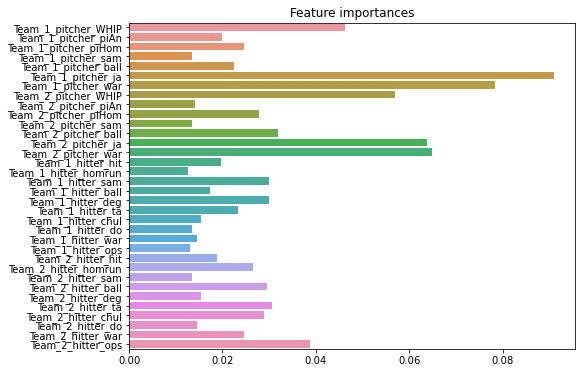

In [53]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

plt.figure(figsize=(8, 6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances, y=ftr_importances.index)
plt.show()